# 6.4 Capstone Project - Inferential Statistics

## Introduction:

In this notebook, we're going to apply some inferential statistics techniques, including hypothesis testing and correlations, and break down some of the observations we found in the previous analyses - review the storytelling notebook.

Here's a quick summary of where we stopped with the data storytelling:

Over 121808 songs, there are 625 unique genres in this data set and they separate quite well in the number of songs that each genre has.

We explored a number of other characteristics such as Danceability, Instrumentalness, Time Signature, Tempo etc. and also further explored how some of these vary with Genre and Popularity.

1. For Danceability, we saw that 75% of the data was contained under 0.7 and while working with the mean of this metric across Genre, we saw that a good 70 genres were "highly danceable" (>0.7)

2. For Instrumentalness, after we worked with the genre means we saw that there is a population that varied in popularity from 0-60 but was overall low in instrumentalness. And we had 101 highly instrumental genres. We also varied this with popularity. We saw that the most instrumental genre had very low popularity - earlyromanticera. And the most popular of the highly instrumental genres was meditation.

3. For Time Signatures, we saw that there were a good 13101 songs with non-standard time signatures (not 4.0). These did not separate well on genres, and included 585 out of the 625 genres in the 13101 songs. Of these songs, 3.0 and 5.0 were the most frequently occurring and also had similar distributions, medians and IQR, as evidenced by the violin plot.

4. For Tempo, the data was spread roughly between 40 and 200, with some outliers. It did not vary distinctly with popularity.

5. Danceability and Energy did not vary distinctly.

6. The scatter of Speechness and Instrumentalness, shows a distinct population which ranges from 0.0 to 0.4 in Speechness while varying from 0.0 through 1.0 in Instrumentalness. This seems to be the majority of the data. So it doesn't vary distinctly with instrumentalness.

7. The metric of Popularity by itself is spread across from 0-100, 75% of the data falls under 43. And it doesn't seem to be spread across any specific genre distinctly. Some of the lowest genres include celticmetal, which shows values of 0, implying that it was not listened to at all during that week.

* Given that points 4-7 did yield much to analyze further, we can skip further analysis on those points.

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [9]:
df = pd.read_csv("FinalData.csv", sep = ',')
print(df.shape)

# repeating step to clean data from previous notebook, as the read induces some errors
df = df.dropna()

df.head()

(121815, 18)


,ID,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Artists,Popularity
0,6J2VvzKwWc2f0JP5RQVZjq,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,The HU,55
1,4HA34COgxgVJ6zK88UN4Ik,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,Gloryhammer,21
2,3W6Xik6Xxf06JuUoZSATlD,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,Orion's Reign,2
3,2gGveBaLJQMtJ43X4UL5kH,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,Brothers of Metal,50
4,1lRF81A1C9QoCgBcEop2zg,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,Powerwolf,22


In [10]:
df.shape

(121808, 18)

**1. For Danceability, we saw that 75% of the data was contained under 0.7 and while working with the mean of this metric across Genre, we saw that a good 70 genres were "highly danceable" (>0.7).**

Let's take a look at the "Highly Danceable" genres and see if popularity measures up.

$H_{0}:$ **Danceability** and **Popularity** are independent for the highly danceable music.

$H_{A}:$ A dependency exists between **Danceability** and **Popularity** for highly danceable music.

alpha=0.05

In [18]:
# hd = highly danceable (>=0.7)
hd = df[df.Danceability >= 0.7]
print(hd.head())

# we will work off of the means of each genre
hd = hd.groupby('Genre').mean()
hd = hd.reset_index()
hd = hd[['Genre', 'Danceability', 'Popularity']]
hd = hd.sort_values(by='Danceability')
hd.head()

                         ID                                Name  Danceability  \
284  0AQquaENerGps8BQmbPw14                             BigIron         0.726   
307  4EAOs3MR4OGtGqwkSEbqO8  Medley:RingOfFire/ILoveRockAndRoll         0.710   
308  5PiXOZhxLEPVmyqQU97yJ3                         AceOfSpades         0.721   
349  2VbqcwDHaSgeSQtM4YGLvI                           LaLeyenda         0.738   
476  16E0MUDEEEJHY4qO85gVPZ                      TheNightingale         0.787   

     Energy  Key  Loudness  Mode  Speechness  Acousticness  Instrumentalness  \
284   0.474  1.0    -7.834   0.0      0.0491         0.803           0.00000   
307   0.552  7.0    -6.301   1.0      0.0349         0.411           0.00000   
308   0.650  6.0   -10.263   0.0      0.0980         0.270           0.00141   
349   0.423  4.0    -9.089   0.0      0.0548         0.754           0.47800   
476   0.722  0.0   -11.920   1.0      0.0287         0.654           0.97100   

     Liveness  Valence    Tempo 

,Genre,Danceability,Popularity
269,hardvapour,0.700500,15.500000
31,austrianmetal,0.702000,1.000000
84,chicagopunk,0.703000,38.000000
427,progressivetrance,0.703333,17.333333
126,czechfolk,0.707000,12.000000


In [16]:
hd.shape

(558, 2)

In [21]:
hd.describe()

,Danceability,Popularity
count,558.000000,558.000000
mean,0.767623,26.919288
std,0.025543,15.250452
min,0.700500,0.000000
25%,0.751415,15.213869
50%,0.767417,26.330952
75%,0.783109,37.860197
max,0.855924,73.000000


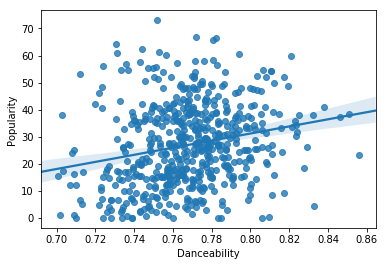

In [20]:
sns.regplot(x='Danceability', y='Popularity', data=hd, fit_reg=True)
plt.show()

We can see a very loose trend that as Danceability increases, Popularity also seems to follow. Let us test this.

In [43]:
stat, p = stats.pearsonr(hd.Danceability, hd.Popularity)
print("p-value: ", p)
if p > 0.05:
    print('\nWe accept the Null Hypothesis in this case: The Danceabiility and Popularity are probably independent for highly danceable data')
else: 
    print('\nWe reject the Null Hypothesis, and accept the Alternate Hypothesis: Danceability and Popularity have a dependency.')    

p-value:  1.541768372533525e-07

We reject the Null Hypothesis, and accept the Alternate Hypothesis: Danceability and Popularity have a dependency.


**2. For Instrumentalness, after we worked with the genre means we saw that there is a population that varied in popularity from 0-60 but was overall low in instrumentalness. And we had 101 highly instrumental genres. We also varied this with popularity. We saw that the most instrumental genre had very low popularity - earlyromanticera. And the most popular of the highly instrumental genres was meditation.**

Let us try to examine how the highly instrumental genres vary with popularity.

$H_{0}:$ Instrumentalness and Popularity are independent for highly instrumental genres

$H_{A}:$ Instrumentalness and Popularity have a dependency for highly instrumental genres

alpha: 0.05

In [44]:
# hi = highly instrumental (>=0.54) See Storytelling notebook to see how we landed on this chosen value
hi = df[df.Instrumentalness >= 0.54]
hi = hi[['Genre', 'Instrumentalness', 'Popularity']]
print(hi.head())

# we will work off of the means of each genre
hi = hi.groupby('Genre').mean()
hi = hi.reset_index()
hi = hi.sort_values(by='Instrumentalness')
hi.head(20)

          Genre  Instrumentalness  Popularity
18  celticmetal             0.916          42
30  celticmetal             0.778           1
44  celticmetal             0.835          46
52  celticmetal             0.812          12
57  celticmetal             0.707          31


,Genre,Instrumentalness,Popularity
240,girlgroup,0.546000,35.000000
445,rock,0.563000,41.000000
100,classicswedishpop,0.564500,40.000000
308,latinmetal,0.567000,13.500000
460,scandinavianr&b,0.569000,30.000000
279,indonesianhiphop,0.577000,0.000000
177,earlymusic,0.584000,36.000000
19,atmosphere,0.590000,44.000000
435,rapmetalcore,0.594500,20.500000
191,estonianhiphop,0.599000,1.000000


In [45]:
hi.tail(20)

,Genre,Instrumentalness,Popularity
476,spaceambient,0.897703,34.715190
291,italianrenaissance,0.900007,7.562914
215,frenchhiphop,0.902000,0.000000
477,spanishfolk,0.902682,18.447059
54,britishbrassband,0.903467,11.171429
403,polishfolk,0.907000,14.000000
349,musicaperbambini,0.914667,18.424242
110,countryrap,0.915000,46.000000
86,christianpunk,0.915000,19.000000
540,welshchoir,0.915000,4.000000


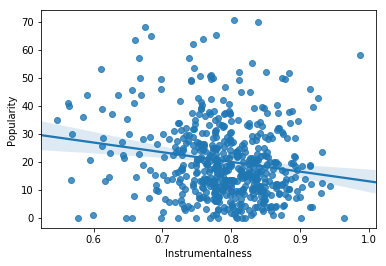

In [46]:
sns.regplot(x='Instrumentalness', y='Popularity', data=hi, fit_reg=True)
plt.show()

We see a trend that as Instrumentalness goes down, Popularity also goes down.

In [47]:
stat, p = stats.pearsonr(hi.Instrumentalness, hi.Popularity)
print("p-value: ", p)
if p > 0.05:
    print('We accept the Null Hypothesis in this case: The Instrumentalness and Popularity are probably independent for highly instrumental music')
else: 
    print('We reject the Null Hypothesis, and accept the Alternate Hypothesis: Instrumentalness and Popularity have a dependency.')    

p-value:  4.57539854463985e-05
We reject the Null Hypothesis, and accept the Alternate Hypothesis: Instrumentalness and Popularity have a dependency.


**3. For Time Signatures, we saw that there were a good 13101 songs with non-standard time signatures (not 4.0). These did not separate well on genres, and included 585 out of the 625 genres in the 13101 songs. Of these songs, 3.0 and 5.0 were the most frequently occurring and also had similar distributions, medians and IQR, as evidenced by the violin plot.**

$H_{0}:$ 3.0 and 5.0 time signature songs are do not differ in the means of their popularity.

$H_{A}:$ 3.0 and 5.0 time signature songs are significantly different in the means of their popularity.

alpha: 0.05

In [56]:
# extracting 3.0 and 5.0 non-std time signatures

# a - 3.0 time signatures
a = df[df.time_signature == 3.0].Popularity
print(len(a))

# b - 5.0 time signatures
b = df[df.time_signature == 5.0].Popularity
len(b)

10223


1786

In [57]:
# We will perform a two-sample independent t-test to evaluate how different they are.
t, p = stats.ttest_ind(a, b)
print("\nt-statistic: ", t)
print("\np-value: ", p)
if p > 0.05:
    print('\nWe accept the Null Hypothesis: The two time signatures do not differ in the means of their popularity')
else:
    print('\nWe reject the Null Hypothesis and accept the Alternate Hypothesis: The two time signatures do differ in the means of their popularity')


t-statistic:  -1.8591433901138583

p-value:  0.06303126194492673

We accept the Null Hypothesis: The two time signatures do not differ in the means of their popularity


* Given that we see 3.0 and 5.0 to have similar distributions, let us try to understand how the distributions for the non-standard time signatures 1.0 and 5.0 vary with each other, as they do seem to vary in popularity, as evidenced by the violin plot in the storytelling notebook.

$H_{0}:$ 1.0 and 5.0 time signature songs are do not differ in the means of their popularity.

$H_{A}:$ 1.0 and 5.0 time signature songs are significantly different in the means of their popularity.

alpha: 0.05

In [61]:
# extracting 1.0 and 5.0 non-std time signatures

# a - 1.0 time signatures
c = df[df.time_signature == 1.0].Popularity
print(len(c))

# b - 5.0 time signatures
d = df[df.time_signature == 5.0].Popularity
len(d)

1061


1786

In [62]:
# We will perform a two-sample independent t-test to evaluate how different they are.
t, p = stats.ttest_ind(c, d)
print("\nt-statistic: ", t)
print("\np-value: ", p)
if p > 0.05:
    print('\nWe accept the Null Hypothesis: The two time signatures do not differ in the means of their popularity')
else:
    print('\nWe reject the Null Hypothesis and accept the Alternate Hypothesis: The two time signatures do differ in the means of their popularity')


t-statistic:  -3.2003243186418935

p-value:  0.0013878371734410704

We reject the Null Hypothesis and accept the Alternate Hypothesis: The two time signatures do differ in the means of their popularity


* We can see that there is certainly a significant difference between the 1.0 and 5.0 time signatures **AND** there isn't a significant difference between 3.0 and 5.0 signatures, as predicted by the distributions in the violin plots in our initial analysis (in the Storytelling notebook).